In [1]:
import numpy as np
import glob

import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
from read_funcs import*
from scipy.interpolate import interp1d
from numpy import trapz

import pandas as pd
import seaborn as sns



In [2]:
E = lambda e1,e2,sig,r: 4*(e1* ( (sig/r)**12-(sig/r)**6) +e2*(sig/r)**2)


In [3]:
f= 'interp.table'

In [4]:
e1=1.6
e2=.2
sig=1
r=np.linspace(.98,4,1000)

In [5]:
%%latex
\begin{equation}
U(r) = 4  [ \big(\frac{\sigma}{r}\big)^{12}\epsilon-\big(\frac{\sigma}{r}\big)^{6}\epsilon]
\end{equation}


\begin{equation}
F(r) = 24  [ \big(\frac{\sigma}{r}\big)^{12}\epsilon-\big(\frac{\sigma}{r}\big)^{6}\epsilon]
\end{equation}

<IPython.core.display.Latex object>

In [6]:
%%latex
\begin{equation}
U(r) = 4  [ \big(\frac{\sigma}{r}\big)^{12}\epsilon_1-\big(\frac{\sigma}{r}\big)^{6}\epsilon_1+\big(\frac{\sigma}{r}\big)^{2}\epsilon_2]
\end{equation}

<IPython.core.display.Latex object>

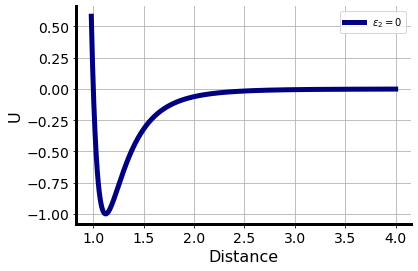

In [9]:
fig,ax = plt.subplots()
#ax.plot(r,E(1.8,e2,sig,r),lw=5,c='navy',label='$\epsilon_2 = .2$')
ax.plot(r,E(1,0,sig,r),lw=5,c='navy',label='$\epsilon_2 = 0$')
ax.grid()
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Distance',fontsize=16)
ax.set_ylabel('U',fontsize=16)
#plt.plot(r[1:],np.diff(E(e,sig,r)))
ax.legend()

#plt.title(r'$\epsilon_2 = 0$')

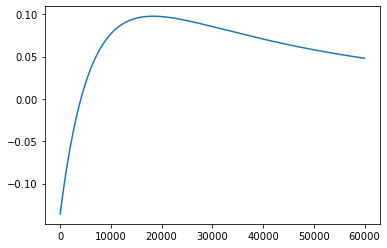

In [35]:
plt.plot(np.loadtxt("potential.table",delimiter =" ")[40000:,2])

In [7]:
e1=2
e2=.2
sig=1
r=np.linspace(.98,4,1000)

Text(0.5, 1.0, '$\\epsilon_2 = .2$')

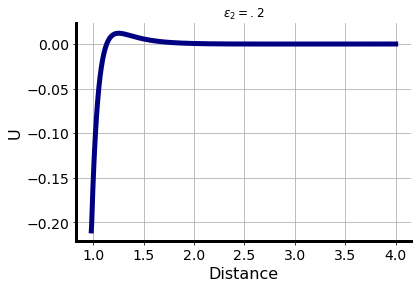

In [8]:
fig,ax = plt.subplots()
ax.plot(r,np.gradient(E(e1,e2,sig,r)),lw=5,c='navy')
ax.grid()
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Distance',fontsize=16)
ax.set_ylabel('U',fontsize=16)
#plt.plot(r[1:],np.diff(E(e,sig,r)))
plt.title(r'$\epsilon_2 = .2$')

In [359]:
import numpy as np
import numpy as np
import glob
import os 
from datetime import datetime


path = os.getcwd()
file_str = "potential.table"
f = open(file_str, "a")

f.write('CUSTOM\n')
E = lambda e1,e2,sig,r: 4*(e1* ( (sig/r)**12-(sig/r)**6) +e2*(sig/r)**2)

e1=2
e2=.2
sig=1
N=10**5
r_min = .99
r_space1=np.linspace(.001,r_min,N)
r_space2=np.linspace(r_min,6,N)
f.write('N '+str(2*N)+'\n\n')
for i,r in enumerate(r_space1):
    f.write(str(i+1) +" " +str(r)+" "+ str(E(e1,e2,sig,r_min)) +" "+str(-np.gradient(np.array(E(e1,e2,sig,r_min))))+"\n")
for i,r in enumerate(r_space2):
    f.write(str(i+1+N) +" " +str(r)+" "+ str(E(e1,e2,sig,r)) +" "+str(-np.gradient(np.array(E(e1,e2,sig,r))))+"\n")
            
f.close()

TypeError: bad operand type for unary -: 'list'

In [362]:
np.array(E(e1,e2,sig,r_min)))

SyntaxError: unexpected EOF while parsing (<ipython-input-362-491e20203725>, line 1)

In [244]:
sfiles = glob.glob('sim_files*/stress*.out')
afiles = glob.glob('sim_files*/traj*.out')
tTot = len(getTimeArr(afiles[0]))
cellnum = getAtomNumber(afiles[0])
cell_arr = getLastCellArr(afiles[0],tTot,cellnum)
hi = getDims(afiles[0])

IndexError: list index out of range

In [43]:
np.loadtxt('interp.table',delimiter=" ")

ValueError: Wrong number of columns at line 100003

In [538]:
cols = ("Width","Thickness","Deform scale", "Height","Length","Peaks","Sample")
df = pd.DataFrame(columns = cols)

In [591]:
z_length = np.array([6,12,18])
x_length = np.array([100,150,200])
deform_scale = np.array([.5,.7,.9])
samples=np.arange(10)
#data = np.zeros((len(afiles), 7))   
amps = np.zeros((len(afiles), 2))
z_str =["thick_"+str(z) for z in z_length]
x_str =["len_"+str(x) for x in x_length]
d_str = ["scale_"+str(d) for d in deform_scale]
n_str = ["rep_"+str(n) for n in samples]
i=0
for af in afiles[:5]:
    for ns,n in zip(n_str,samples):
        for zs,z in zip(z_str,z_length):
            for xs,x in zip(x_str,x_length):
                for ds,scale in zip(d_str,deform_scale):
                    
                    if  (ns in af) and (zs in af) and (xs in af) and (ds in af):
                        
                        tTot = len(getTimeArr(af))
                        cellnum = getAtomNumber(af)
                        cell_arr = getLastCellArr(af,tTot,cellnum)
                        dims = getDims(af)
                        #print(af)
                        #print(dims)
                        cell_arr = cell_arr*dims
                        x_coor=cell_arr[:,0]
                        y_coor=cell_arr[:,1]

                                                      
                        
                        res = [] 
                        inds = []
                        #for ix,xi in enumerate(x_coor.tolist()): 
                        #    if xi not in res: 
                        #        res.append(xi) 
                        #        inds.append(ix)

                        #x_coor=x_coor[inds]
                        #y_coor=y_coor[inds]
                        #y_coor = y_coor[np.argsort(x_coor)]
                        #x_coor =np.sort(x_coor)
                        #regressionLineOrder = 4
                        #regressionLine = np.polyfit(x_coor, y_coor,regressionLineOrder)
                        #p = np.poly1d(regressionLine)
                        #length = np.sum(((p(x_coor)[:-1]-p(x_coor)[1:])**2 + (x_coor[1:] - x_coor[:-1])**2)**.5)

                        #opts = len(argrelextrema(p(x_coor), np.greater)[0])+len(argrelextrema(p(x_coor), np.less)[0])
                        amp =np.max(y_coor)-np.min(y_coor)
                        wvlngth =np.argmax(y_coor)-np.argmin(y_coor)
                        amps[i]=np.array([amp,wvlngth])
                        #data[i] = np.array([x,z,scale,amp,length,opts,n])
                        #df=df.append(pd.DataFrame(data = np.array([[x],[z],[scale],[amp],[n],[af[28:]]]).T,columns=cols))
                        i+=1
                        

In [578]:
df

,Width,Thickness,Deform scale,Height,Length,Peaks,Sample
0,200.0,12.0,0.9,1925.639701,200.102154,2.0,3.0
1,200.0,18.0,0.9,2.174164,200.175360,3.0,4.0
2,150.0,6.0,0.5,2.520096,150.196698,3.0,3.0
3,200.0,6.0,0.7,17.586517,200.144136,3.0,7.0
4,200.0,12.0,0.7,1.852050,200.163934,3.0,8.0
...,...,...,...,...,...,...,...
265,150.0,12.0,0.5,2.020315,150.009543,2.0,1.0
266,200.0,18.0,0.9,8.947527,200.175360,3.0,9.0
267,150.0,18.0,0.5,2.520096,150.147622,3.0,6.0
268,200.0,18.0,0.7,5.673699,200.270259,3.0,2.0


In [561]:
df=df.append(pd.DataFrame(data=data,columns=cols))

In [562]:
df=df.astype(float)

In [551]:
df.to_csv('out.csv')

In [563]:
df.groupby(['Thickness','Deform scale']).mean()


Width     Height      Length     Peaks  Sample
Thickness Deform scale                                                
6.0       0.5           150.0   5.792273  150.114246  2.333333     4.5
          0.7           150.0   6.543965  150.103762  3.000000     4.5
          0.9           150.0   2.384107  149.992820  2.000000     4.5
12.0      0.5           150.0   5.212159  150.055654  2.333333     4.5
          0.7           150.0   6.797003  150.137874  2.000000     4.5
          0.9           150.0  65.665396  150.043401  1.666667     4.5
18.0      0.5           150.0   3.431751  150.109474  3.000000     4.5
          0.7           150.0   1.661926  150.170171  2.333333     4.5
          0.9           150.0   3.420293  150.100733  2.666667     4.5

In [575]:
df_hm

Width    Height      Length  Peaks  Sample
Thickness Deform scale                                            
6.0       0.5           100.0  0.981077  100.010429    1.0     4.5
          0.7           100.0  0.756475   99.993689    3.0     4.5
          0.9           100.0  1.181878  100.001096    2.0     4.5
12.0      0.5           100.0  0.771457  100.070586    2.0     4.5
          0.7           100.0  0.800547  100.159785    2.0     4.5
          0.9           100.0  0.996487  100.005171    1.0     4.5
18.0      0.5           100.0  1.004273  100.028952    3.0     4.5
          0.7           100.0  0.627585  100.080074    2.0     4.5
          0.9           100.0  1.070917  100.072742    2.0     4.5

In [573]:
df_hm = df.loc[df['Width']==100,:].groupby(['Thickness','Deform scale']).mean()
hm_arr=(df_hm['Height']).values

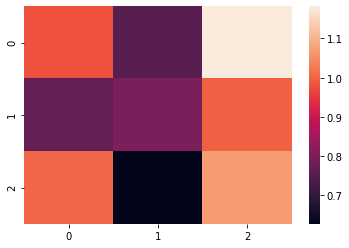

In [574]:
sns.heatmap(hm_arr.reshape(3,3))

In [27]:
x=(hi*cell_arr)[:,0]
y=(hi*cell_arr)[:,1]
res = [] 
inds = []
for i,xi in enumerate(x.tolist()): 
    if xi not in res: 
        res.append(xi) 
        inds.append(i)
        
x=x[inds]
y=y[inds]



In [144]:

regressionLineOrder = 4
regressionLine = np.polyfit(np.sort(x), y[np.argsort(x)],regressionLineOrder)
p = np.poly1d(regressionLine)
amp =np.max(np.sort(x))-np.min(p(np.sort(x)))
wvlngth =np.sort(x)[np.argmax(p(np.sort(x)))]-np.sort(x)[np.argmin(p(np.sort(x)))]
length = np.sum(((p(np.sort(x))[:-1]-p(np.sort(x))[1:])**2 + (np.sort(x)[1:] - np.sort(x)[:-1])**2)**.5)
shortlen =np.sort(x)[-1]-np.sort(x)[0]
opts = len(argrelextrema(y_fit, np.greater)[0])+len(argrelextrema(y_fit, np.less)[0])

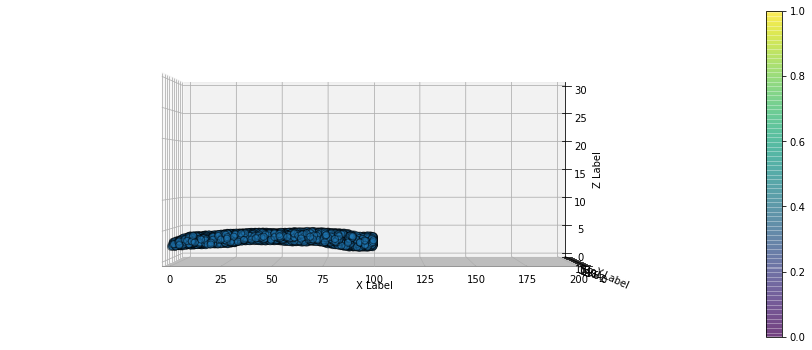

In [501]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111, projection='3d')

t=len(cell_arr)-1
af=afiles[5]
tTot = len(getTimeArr(af))
cellnum = getAtomNumber(af)
cell_arr = getLastCellArr(af,tTot,cellnum)
dims = getDims(af)
#print(af)
#print(dims)
cell_arr = cell_arr*dims

x=cell_arr[:,0]
y= cell_arr[:,2]
z=cell_arr[:,1]
#f = np.sum(stress_arr[t,:,2]**2,axis=2)**.5
#f=np.abs(stress_diag[t])

#f = np.sum(cell_arr[t,:,7:]**2,axis=1)**.5

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([0,200])
ax.set_ylim([0,18])

ax.set_zlim([0,30])


im = ax.scatter(x, y,z,s=50,edgecolor='k',cmap='coolwarm',alpha=.5);

ax.view_init(0,270)
plt.colorbar(im)



plt.show()


In [503]:
x=cell_arr[:,0]
y= cell_arr[:,1]


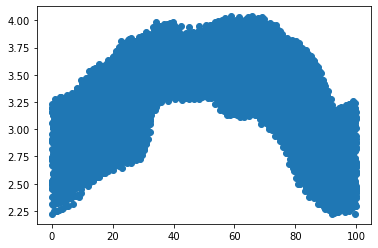

In [506]:
plt.scatter(x,y)

In [511]:
regressionLineOrder = 8
regressionLine = np.polyfit(np.sort(x), y[np.argsort(x)],regressionLineOrder)
p = np.poly1d(regressionLine)
amp =np.max(np.sort(x))-np.min(p(np.sort(x)))
wvlngth =np.sort(x)[np.argmax(p(np.sort(x)))]-np.sort(x)[np.argmin(p(np.sort(x)))]
length = np.sum(((p(np.sort(x))[:-1]-p(np.sort(x))[1:])**2 + (np.sort(x)[1:] - np.sort(x)[:-1])**2)**.5)
shortlen =np.sort(x)[-1]-np.sort(x)[0]
opts = len(argrelextrema(y_fit, np.greater)[0])+len(argrelextrema(y_fit, np.less)[0])

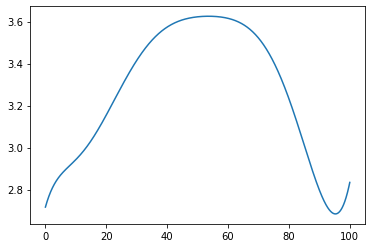

In [512]:
plt.plot(np.sort(x),p(np.sort(x)))

In [866]:
af = np.sort(afiles)[220]
tTot = len(getTimeArr(af))
cellnum = getAtomNumber(af)
cell_arr = getCellArr(af,tTot,cellnum)
dims = getDims(af)
cell_arr=cell_arr*dims

In [867]:
sf = np.sort(sfiles)[220]
stressArr =getStressArr(sf,tTot,cellnum)

In [868]:
cellStress = [[np.sum(np.abs(np.diag(stressArr[t,i]))**2)**.5 for i in range(len(stressArr[0]))] for t in range(len(stressArr))]

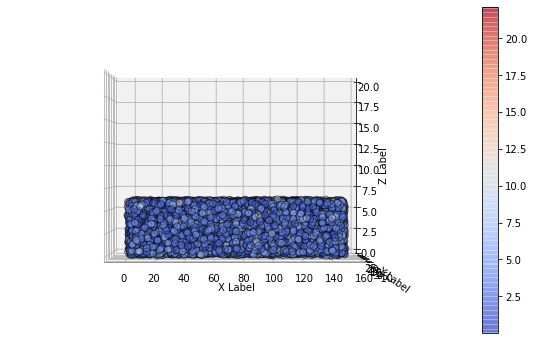

In [889]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

t=len(cell_arr)-1

x=cell_arr[1,:,0]
y= cell_arr[1,:,2]
z=cell_arr[1,:,1]
#f = np.sum(stress_arr[t,:,2]**2,axis=2)**.5
#f=np.abs(stress_diag[t])

#f = np.sum(cell_arr[t,:,7:]**2,axis=1)**.5

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([-10,160])
ax.set_ylim([-10,28])

ax.set_zlim([0,20])


im = ax.scatter(x, y,z,s=50,c=cellStress[-1],edgecolor='k',cmap='coolwarm',alpha=.5);

ax.view_init(0,270)
plt.colorbar(im)



plt.show()



In [878]:
np.min(cellStress)

0.0029607765517512463

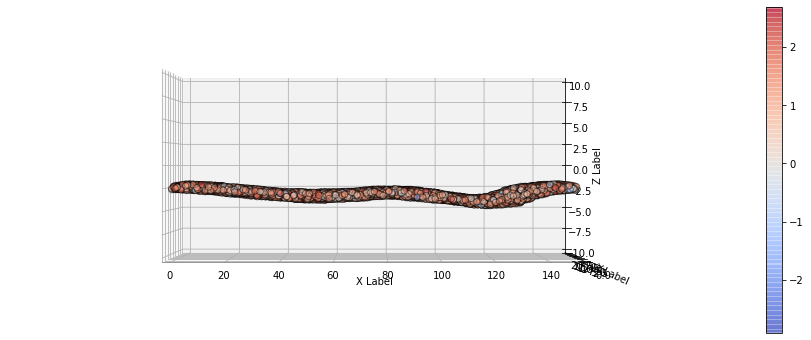

In [879]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111, projection='3d')
t=32
ims=[]
for t in range(len(cell_arr))[20:]:


    x=cell_arr[t,:,0]
    y= cell_arr[t,:,2]
    z=-cell_arr[t,:,1]
    #f = np.sum(cell_arr[t,:,7:]**2,axis=1)**.5

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim([0,150])
    ax.set_ylim([0,20])

    ax.set_zlim([-10,10])


    im = ax.scatter(x, y, z,c=np.log(cellStress[t]),vmin=np.log(np.min(cellStress))/2,
                    vmax=np.log(np.max(cellStress))/2,s=40,cmap='coolwarm',edgecolor='k',alpha=.5);
    ax.view_init(0,270)
    
    ims.append([im])
plt.colorbar(im)
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                            repeat_delay=500,)

ani.save('test3.gif', writer= 'imagemagick' , fps=30)


plt.show()



Text(0, 0.5, "'Average Stress'")

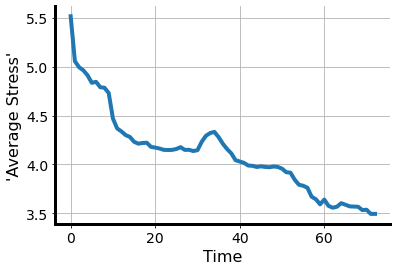

In [703]:
fig,ax=plt.subplots()
ax.plot(np.sum(np.array(cellStress)[20:],axis=1)/cellnum,lw=4)
ax.grid()
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Time',fontsize=16)
ax.set_ylabel("'Average Stress'",fontsize=16)

In [717]:
sf6=np.sort(sfiles)[-30]

In [718]:
sf12= np.sort(sfiles)[60]

In [719]:
sf18 = np.sort(sfiles)[-120]

In [726]:
tTot = len(getTimeArr(sf6))
cellnum6 = getAtomNumber(sf6)
#stressArr6 =getStressArr(sf6,tTot,cellnum)
tTot = len(getTimeArr(sf12))
cellnum12 = getAtomNumber(sf12)
#stressArr12 =getStressArr(sf12,tTot,cellnum)
tTot = len(getTimeArr(sf18))
cellnum18 = getAtomNumber(sf18)
#stressArr18 =getStressArr(sf18,tTot,cellnum)

In [721]:
cellStress6 = [[np.sum(np.abs(np.diag(stressArr6[t,i]))**2)**.5 for i in range(len(stressArr6[0]))] for t in range(len(stressArr6))]
cellStress12 = [[np.sum(np.abs(np.diag(stressArr12[t,i]))**2)**.5 for i in range(len(stressArr12[0]))] for t in range(len(stressArr12))]
cellStress18 = [[np.sum(np.abs(np.diag(stressArr18[t,i]))**2)**.5 for i in range(len(stressArr18[0]))] for t in range(len(stressArr18))]

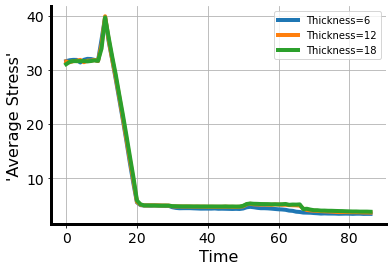

In [747]:
fig,ax=plt.subplots()
thicks= np.array([6,12,18])
for thick,cellnum,cellStress in zip(thicks,[cellnum6,cellnum12,cellnum18],[cellStress6,cellStress12,cellStress18]):
    ax.plot(np.sum(np.array(cellStress),axis=1)/cellnum,lw=4,label='Thickness=' +str(thick))
    ax.grid()
    for axis in ['top','right']:
        ax.spines[axis].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel('Time',fontsize=16)
    ax.set_ylabel("'Average Stress'",fontsize=16)
    
plt.legend()

In [748]:
af6=np.sort(afiles)[-30]
af12= np.sort(afiles)[60]
af18= np.sort(afiles)[-120]

In [731]:
tTot6 = len(getTimeArr(af6))
cellnum6 = getAtomNumber(af6)
tTot12 = len(getTimeArr(af12))
cellnum12 = getAtomNumber(af12)
tTot18 = len(getTimeArr(af18))
cellnum18 = getAtomNumber(af18)

In [734]:
cellArr6 =getLastCellArr(af6,tTot6,cellnum6)
cellArr12 =getLastCellArr(af12,tTot12,cellnum12)
cellArr18 =getLastCellArr(af18,tTot18,cellnum18)

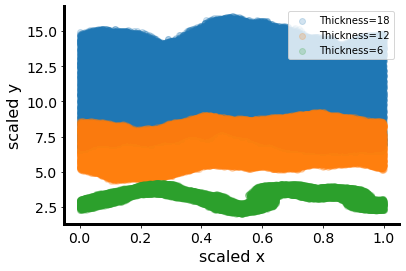

In [804]:
fig,ax=plt.subplots()
for thick, cellArr in zip(thicks[::-1],[cellArr6,cellArr12,cellArr18][::-1]):
    ax.scatter(cellArr[:,0],cellArr[:,1]*thick,alpha=.2,label='Thickness=' +str(thick))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('scaled x',fontsize=16)
ax.set_ylabel("scaled y",fontsize=16)
ax.legend()

In [833]:
af6

'sim_files_10_31_20_15_21_09/traj_10_31_20_15_21_09_thick_6_len_200_scale_0.5_rep_0.out'

In [853]:
lens=[]
amps=[]

for thick,cellArr in zip(thicks,[cellArr6,cellArr12,cellArr18]):
    x=cellArr[:,0]*200
    y=cellArr[:,1]*thick
    regressionLineOrder = 8
    regressionLine = np.polyfit(np.sort(x), y[np.argsort(x)],regressionLineOrder)
    p = np.poly1d(regressionLine)
    amps.append(np.max(y)-np.min(y))
    wvlngth =np.sort(x)[np.argmax(p(np.sort(x)))]-np.sort(x)[np.argmin(p(np.sort(x)))]
    lens.append(np.sum(((p(np.sort(x))[:-1]-p(np.sort(x))[1:])**2 + (np.sort(x)[1:] - np.sort(x)[:-1])**2)**.5))
    shortlen =np.sort(x)[-1]-np.sort(x)[0]
    opts = len(argrelextrema(y_fit, np.greater)[0])+len(argrelextrema(y_fit, np.less)[0])

Text(0.5, 0, 'Thickness')

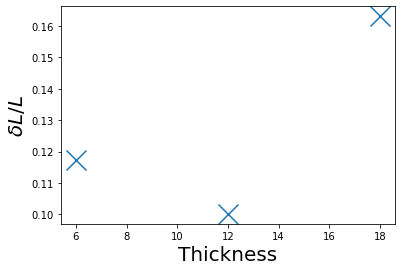

In [864]:
plt.scatter(thicks,np.array(lens)-200,marker = 'x',s=400)

plt.ylabel(r'$\delta L / L$',fontsize=20)
plt.xlabel('Thickness',fontsize=20)

In [759]:
x=cellArr[:,0]
y=cellArr[:,1]
regressionLineOrder = 8
regressionLine = np.polyfit(np.sort(x), y[np.argsort(x)],regressionLineOrder)
p = np.poly1d(regressionLine)
amp =np.max(np.sort(x))-np.min(p(np.sort(x)))
wvlngth =np.sort(x)[np.argmax(p(np.sort(x)))]-np.sort(x)[np.argmin(p(np.sort(x)))]
length = np.sum(((p(np.sort(x))[:-1]-p(np.sort(x))[1:])**2 + (np.sort(x)[1:] - np.sort(x)[:-1])**2)**.5)
shortlen =np.sort(x)[-1]-np.sort(x)[0]
opts = len(argrelextrema(y_fit, np.greater)[0])+len(argrelextrema(y_fit, np.less)[0])

Text(0, 0.5, 'scaled y')

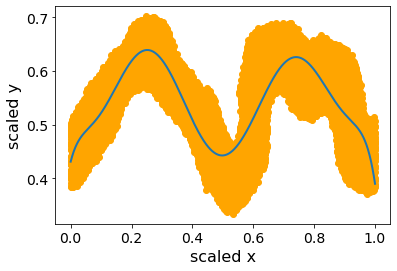

In [772]:
fig,ax= plt.subplots()
ax.plot(np.sort(x),p(np.sort(x)),lw=2)
ax.scatter(x,y,color='orange')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('scaled x',fontsize=16)
ax.set_ylabel("scaled y",fontsize=16)

In [ ]:
fig,ax= plt.subplots()
plt.plot(np.sort(x),p(np.sort(x)))
plt.scatter(x,y)

In [778]:
af6_1= np.sort(afiles)[-29]
tTot6_1 = len(getTimeArr(af6_1))
cellnum6_1 = getAtomNumber(af6_1)
cellArr6_1 =getLastCellArr(af6_1,tTot6_1,cellnum6_1)

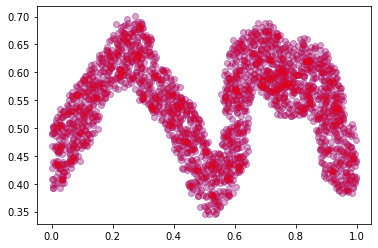

In [803]:
plt.scatter(cellArr6_1[:,0][::10],cellArr6_1[:,1][::10],alpha=.2,c='blue')
plt.scatter(cellArr6[:,0][::10],cellArr6[:,1][::10],alpha=.2,c='red')

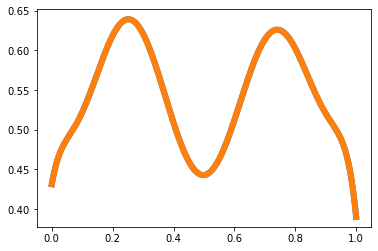

In [784]:
for cellArr in [cellArr6,cellArr6_1]:
    x=cellArr[:,0]
    y=cellArr[:,1]
    regressionLineOrder = 8
    regressionLine = np.polyfit(np.sort(x), y[np.argsort(x)],regressionLineOrder)
    p = np.poly1d(regressionLine)
    plt.plot(np.sort(x),p(np.sort(x)),lw=6)


In [18]:
a,b,c = 1,2,3

In [19]:
a

1

In [20]:
b

2

In [21]:
c

3